# Association Rules Assignment
## movies data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import GridSearchCV

In [41]:
rawdata = pd.read_csv('my_movies.csv')

### EDA and Visualization

In [42]:
rawdata.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


Choosing data for our model

In [43]:
data = rawdata.iloc[:,5:]
data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


Converting data to boolean type for improving performance

In [44]:
data = data.astype('bool')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     bool 
 1   Gladiator      10 non-null     bool 
 2   LOTR1          10 non-null     bool 
 3   Harry Potter1  10 non-null     bool 
 4   Patriot        10 non-null     bool 
 5   LOTR2          10 non-null     bool 
 6   Harry Potter2  10 non-null     bool 
 7   LOTR           10 non-null     bool 
 8   Braveheart     10 non-null     bool 
 9   Green Mile     10 non-null     bool 
dtypes: bool(10)
memory usage: 228.0 bytes


In [46]:
data.shape

(10, 10)

[Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

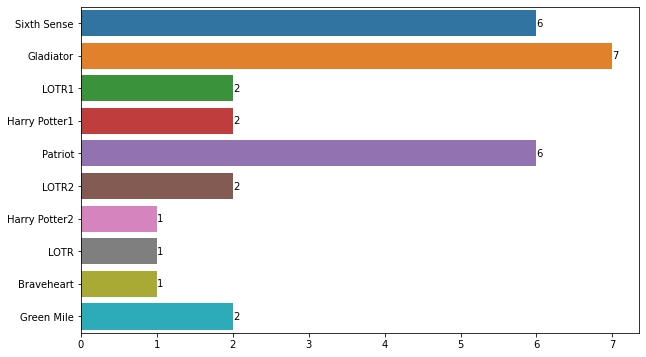

In [47]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=data.sum().index,x=data.sum().values)
ax.bar_label(ax.containers[0])

<AxesSubplot:>

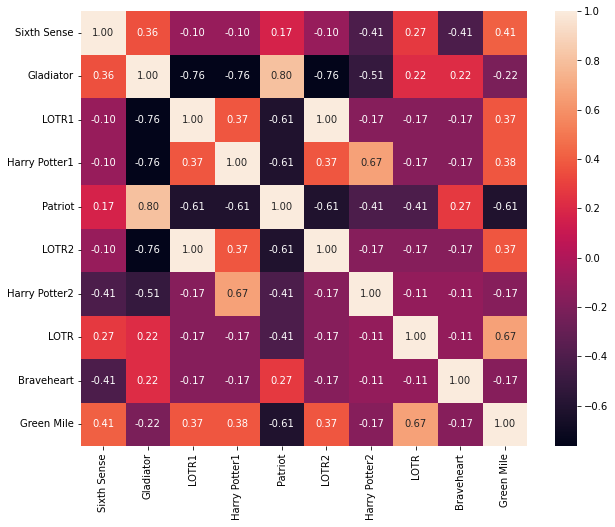

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

### Apriori Algorithm

- the support value is used to identify frequent itemsets in the dataset
- confidence value is used to measure the strength of association between the items in the rules generated from these itemsets

Number of rules for each combination of parameters

In [49]:
param_grid = {'min_support':[0.01,0.03,0.05,0.1,0.15,0.2],
              'min_threshold':[0.5,0.6,0.7,0.8,0.9]}

In [50]:
def model(data,min_support=0.4,min_threshold=0.7):
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
    return rules[rules.lift>1].shape[0]

In [51]:
grid = []
for support in param_grid['min_support']:
    for threshold in param_grid['min_threshold']:
        grid.append([support,threshold,model(data,support,threshold)])
grid = pd.DataFrame(grid,columns=['support','threshold','rules']).pivot('support','threshold','rules')

<AxesSubplot:xlabel='threshold', ylabel='support'>

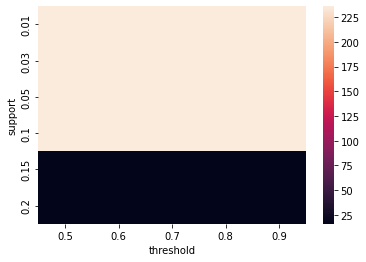

In [52]:
sns.heatmap(grid)

#### Association Rules with 10% support and 80% confidence

In [53]:
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [54]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)
rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
185,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
159,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
228,"(Harry Potter1, LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
227,"(LOTR2, LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
155,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
154,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
226,"(Green Mile, LOTR2, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
183,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
184,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
147,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


Text(0.5, 1.0, 'Association Rules')

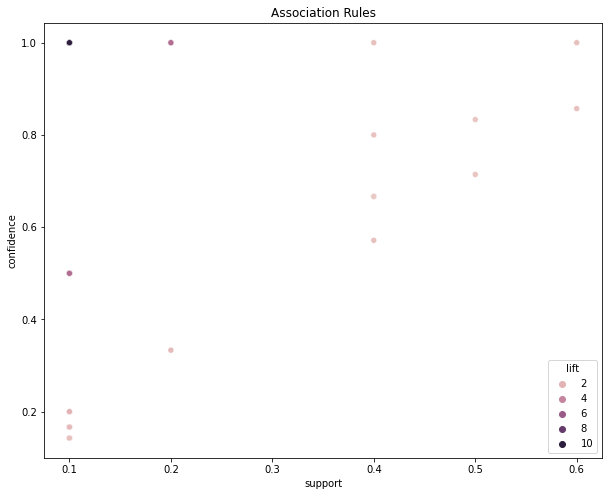

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.title('Association Rules')

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

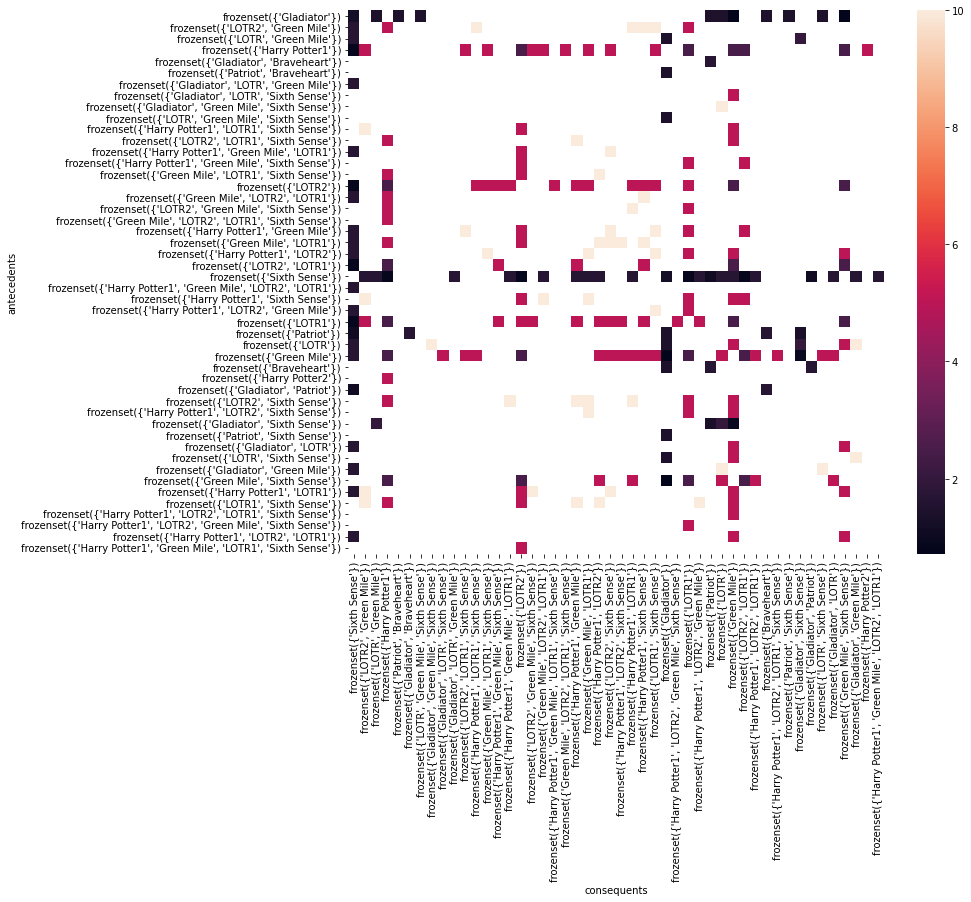

In [56]:
plt.figure(figsize=(12,10))
df = rules.pivot(index='antecedents',columns='consequents',values='lift')
sns.heatmap(df)

#### Association Rules with 20% support and 60% confidence

In [57]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [58]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.6)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


Text(0.5, 1.0, 'Association Rules')

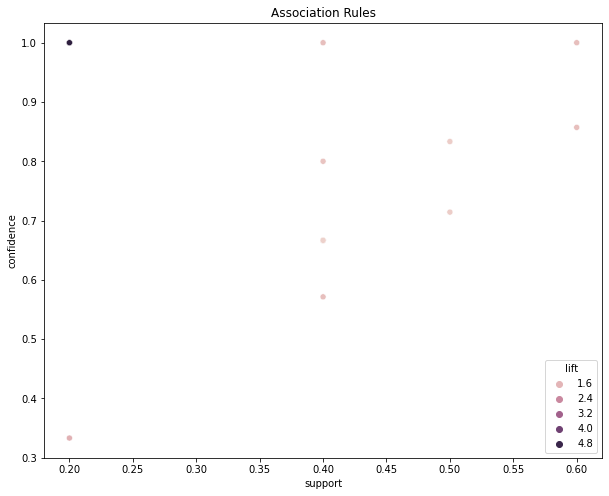

In [59]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.title('Association Rules')

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

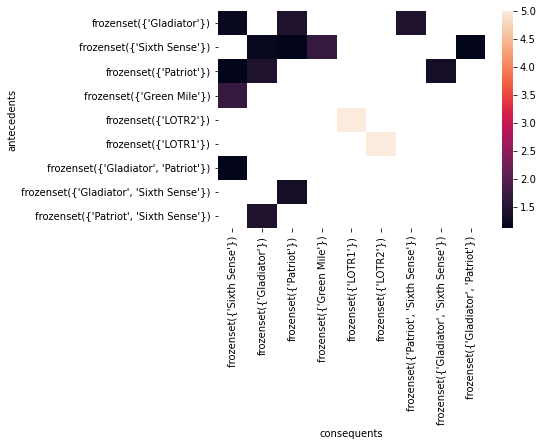

In [60]:
df = rules.pivot(index='antecedents',columns='consequents',values='lift')
sns.heatmap(df)